In [1]:
from include.TriggerPrimitive import TriggerPrimitive as TriggerPrimitive
from include.TPFinder import TPFinder as TPFinder
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#load waveform data (100 low energy electron events, 5 - 100 MeV)
col = np.loadtxt("/eos/home-e/evilla/dune/sn-data/standard/aggregated_prodmarley_nue_spectrum_radiological_decay0_dune10kt_refactored_1x2x6_CC-WFdump-1events_thr30/waveforms_tryWfDumper.txt")
ind = np.loadtxt("data/PedSubWaveform_Induction_Dump.txt")


[[1.0000e+00 1.6690e+03 2.0000e+00 ... 5.0100e+02 5.0100e+02 5.0000e+02]
 [1.0000e+00 1.6710e+03 2.0000e+00 ... 4.9700e+02 4.9600e+02 4.9500e+02]
 [1.0000e+00 1.6930e+03 2.0000e+00 ... 5.0400e+02 4.9900e+02 5.0200e+02]
 ...
 [1.0000e+00 3.0671e+04 2.0000e+00 ... 5.0500e+02 5.0200e+02 5.0500e+02]
 [1.0000e+00 3.0674e+04 2.0000e+00 ... 5.0100e+02 4.9900e+02 5.0100e+02]
 [1.0000e+00 3.0718e+04 2.0000e+00 ... 5.0600e+02 4.9900e+02 4.9500e+02]]


In [ ]:
def area_recover(hit):
    return hit.adc_integral

In [106]:
def plot_dotted_line(x1, y1, x2, y2,y_max,y_min,plot):
    slope = (y2 - y1) / (x2 - x1)
    x_max = (y_max-y1)/slope + x1
    x_min = (y_min-y1)/slope + x1
    x_values = np.linspace(x_min, x_max, 100)
    y_values = slope * (x_values - x1) + y1
    if plot:
        plt.plot(x_values, y_values, 'r--',color='black')
    else:
        return [x_min,x_max]




1


/tmp/hakins/ipykernel_3237695/3217637320.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values, y_values, 'r--',color='black')


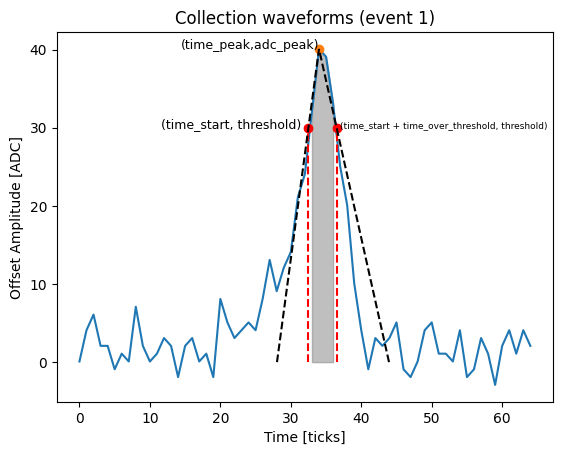

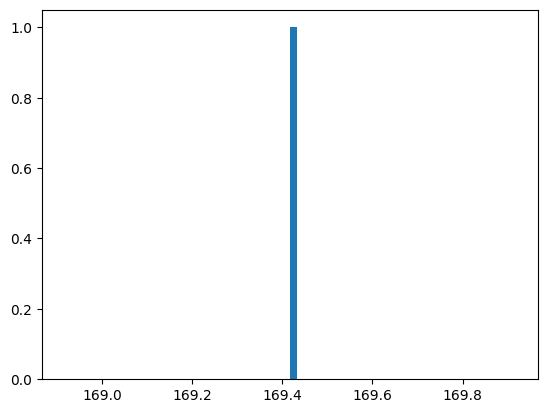

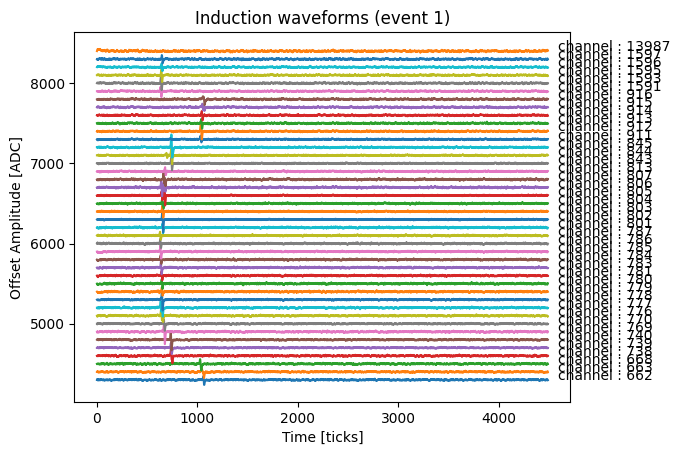

In [105]:
event = 1
threshold = 30

#plot collection waveforms from event
fig1 = plt.figure()
offset = 0
count = 0
adc_integral = []
for data in col:
    if count > 0:
        break
    pedestal = np.mean(data[3:15])
    if np.abs(pedestal-1800) < 100: #only want to pick up collection. 1800 indicates induction
        break
    data[3:] = data[3:] - pedestal
    if (data[0]==event):
        ADCS = data[2960:3025]
        
       
        hits = TPFinder(ADCS, threshold)
        for hit in hits:
            if hit.adc_peak-threshold > 10:
                plt.title("Collection waveforms (event %.0f)" %event)
                plt.plot(ADCS)#offset by channel number
                plt.plot(hit.time_start-.5,threshold ,'o', color='red')
                plt.plot(34,hit.adc_peak, 'o')
                plt.plot(hit.time_start-.5+hit.time_over_threshold,threshold, 'o',color='red')
                #vertical dotted lines
                plt.plot([hit.time_start - 0.5, hit.time_start - 0.5], [0, threshold], 'r--')
                plt.plot([hit.time_start - 0.5 + hit.time_over_threshold, hit.time_start - 0.5 + hit.time_over_threshold], [0, threshold], 'r--')
    
                #traingle dotted lines
                # Plotting the dotted lines
                pos_slope_args = 34, hit.adc_peak, hit.time_start - 0.5, threshold,hit.adc_peak,0,True
                plot_dotted_line(pos_slope_args)
                neg_slope_args = 34, hit.adc_peak, hit.time_start - 0.5 + hit.time_over_threshold, threshold,hit.adc_peak,0,True
                plot_dotted_line(neg_slope_args)
                #plt.plot([34,hit.time_start - 0.5], [hit.adc_peak, threshold], 'r--', color='black')
                #plt.plot([34, hit.time_start - 0.5 + hit.time_over_threshold], [hit.adc_peak, threshold], 'r--',color='black')
                
                #adding text
                plt.text(hit.time_start - 0.5 - 1, threshold, '(time_start, threshold)', fontsize=9, ha='right')
                plt.text(34, hit.adc_peak, '(time_peak,adc_peak)', fontsize=9, ha='right')
                plt.text(hit.time_start - 0.5 + hit.time_over_threshold+30, threshold, '(time_start + time_over_threshold, threshold)', fontsize=6.5, ha='right')
                
                #shading adc_integral area
                x_positions = np.arange(len(ADCS))
                start = (hit.time_start - 0.5)
                end = (hit.time_start - 0.5 + hit.time_over_threshold)
                plt.fill_between(
                x_positions, 0, ADCS,
                where=(x_positions >= start) & (x_positions <= end),
                color='gray', alpha=0.5, label='Shaded Region')

                print(hit.time_peak)
                adc_integral.append(hit.adc_integral)
                count+=1
                
                #shading traingle arae
                x_positions = np.arange(plot_dotted_line())
                start = (hit.time_start - 0.5)
                end = (hit.time_start - 0.5 + hit.time_over_threshold)
                plt.fill_between(
                x_positions, 0, ADCS,
                where=(x_positions >= start) & (x_positions <= end),
                color='gray', alpha=0.5, label='Shaded Region')

                print(hit.time_peak)
                adc_integral.append(hit.adc_integral)
                count+=1
                
                
    
           
        #plt.text(len(ADCS) + 100, offset, 'channel : %.0f' %data[1])
        offset+=100
        plt.ylabel("Offset Amplitude [ADC]")
        plt.xlabel("Time [ticks]")
        #plt.savefig('/afs/cern.ch/work/h/hakins/private/tp-generator/plots/wave_with_TPs')
plt.show()

plt.hist(adc_integral, bins=60)
plt.show()

#plot induction waveforms for event
for data in ind:
    if (data[0]==event):
        ADCS = data[2:]
        plt.title("Induction waveforms (event %.0f)" %event)
        plt.plot(ADCS + offset)#offset by channel number
        plt.text(len(ADCS) + 100, offset, 'channel : %.0f' %data[1])
        offset+=100
        plt.ylabel("Offset Amplitude [ADC]")
        plt.xlabel("Time [ticks]")
plt.show()
